# Exercice 1 - Mariages à Poitiers

Afficher dans un graphique uniquement le nombre de mariages par mois et regrouper par année, pour vérifier que chaque année, nous retrouvons les mêmes ordres de grandeur.

In [9]:
import pandas as pd

Lire un fichier au format CSV avec pandas ou au format JSON. Il est possible de passer en argument une URL ou un chemin local au script.

In [10]:
statsPoitiersCSV = pd.read_csv('/tmp/citoyennete-mariages-a-poitiers.csv', sep=';')

In [11]:
try:
    statsPoitiersJSON = pd.read_json('https://www.data.gouv.fr/fr/datasets/r/7d9a5c8d-dea7-4d7c-9c92-2c45068eae95')
except:
    pass

Visualiser la liste des colonnes et vérifier les valeurs présentes dans celle indiquant le type de contrat

In [12]:
statsPoitiersCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   annee         432 non-null    int64 
 1   mois          432 non-null    int64 
 2   type_contrat  432 non-null    object
 3   value         432 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.6+ KB


In [13]:
#statsPoitiersJSON.info()

Filtrer la colonne type_contrat sur la valeur `'CONTRAT DE MARIAGE'` et stocker le résultat dans un nouveau dataframe

In [14]:
contratsDeMariage = statsPoitiersCSV[statsPoitiersCSV['type_contrat'].isin(['CONTRAT DE MARIAGE', 'NOMBRE DE MARIAGES'])]

In [15]:
type(contratsDeMariage)

pandas.core.frame.DataFrame

In [16]:
contratsDeMariage.head()

,annee,mois,type_contrat,value
1,2014,2,NOMBRE DE MARIAGES,1
9,2014,10,NOMBRE DE MARIAGES,22
15,2015,3,CONTRAT DE MARIAGE,1
16,2015,4,NOMBRE DE MARIAGES,19
18,2015,5,CONTRAT DE MARIAGE,2


In [17]:
# supprimer la colonne type_contrat
try:
    contratsDeMariage.pop('type_contrat') #altération du dataframe source
except:
    pass
contratsDeMariage

,annee,mois,value
1,2014,2,1
9,2014,10,22
15,2015,3,1
16,2015,4,19
18,2015,5,2
...,...,...,...
417,2018,8,28
420,2018,9,6
421,2018,10,16
423,2019,1,3


In [18]:
contratsDeMariage[['annee', 'mois', 'value']] #création d'un nouveau dataframe

,annee,mois,value
1,2014,2,1
9,2014,10,22
15,2015,3,1
16,2015,4,19
18,2015,5,2
...,...,...,...
417,2018,8,28
420,2018,9,6
421,2018,10,16
423,2019,1,3


In [20]:
# grouper selon les années et les mois et appliquer la fonction sum à chaque groupe d'agrégation
result = contratsDeMariage.groupby(['annee', 'mois']).sum()

In [23]:
result.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   annee   72 non-null     int64
 1   mois    72 non-null     int64
 2   value   72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [72]:
# affihcher le graphique du dataframe result, quel est le problème ?
readyToPlot = result.unstack('annee')

In [24]:
readyToPlot = result.reset_index()

In [73]:
readyToPlot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2014    12 non-null     int64
 1   2015    12 non-null     int64
 2   2016    12 non-null     int64
 3   2017    12 non-null     int64
 4   2018    12 non-null     int64
 5   2019    12 non-null     int64
dtypes: int64(6)
memory usage: 672.0 bytes


In [44]:
readyToPlot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   annee   72 non-null     int64
 1   mois    72 non-null     int64
 2   value   72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [41]:
dfPivot = readyToPlot.pivot(index='mois', columns='annee', values='value')

<Axes: xlabel='mois'>

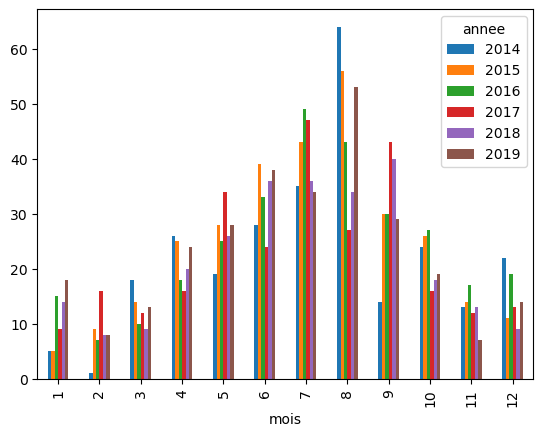

In [42]:
dfPivot.plot.bar()

# Exercice 2 - Candidats

A partir d'un jeu de données fourni par la plateforme datagouv, afficher le temps de parole de chacun des candidats puis afficher le temps de parole par courant politique. Pour simplifier, nous allons prendre le temps de parole de la gauche et de la droite.

In [45]:
import pandas as pd

In [123]:
tempsParole = pd.read_csv('/tmp/50TP-TA_Presidentielle_2022__1er janvier au 7 mars 2022_v2.csv', encoding='latin1', sep=';')

In [50]:
tempsParole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Service          2675 non-null   object
 1   Circonscription  2675 non-null   object
 2   Candidat         2675 non-null   object
 3   Type de temps    2675 non-null   object
 4   Durée            2675 non-null   object
 5   Pourcentage      2675 non-null   object
dtypes: object(6)
memory usage: 125.5+ KB


In [55]:
tempsParole['Candidat'].convert_dtypes()

0       ARTHAUD NATHALIE
1       ARTHAUD NATHALIE
2       ARTHAUD NATHALIE
3       ARTHAUD NATHALIE
4       ARTHAUD NATHALIE
              ...       
2670     Total candidats
2671     Total candidats
2672     Total candidats
2673     Total candidats
2674     Total candidats
Name: Candidat, Length: 2675, dtype: string

In [62]:
tempsParole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Service          2675 non-null   object
 1   Circonscription  2675 non-null   object
 2   Candidat         2675 non-null   object
 3   Type de temps    2675 non-null   object
 4   Durée            2675 non-null   object
 5   Pourcentage      2675 non-null   object
dtypes: object(6)
memory usage: 125.5+ KB


## Remplacer françois

Le candidat François Asselineau est écrit de 2 manières différentes.
Pour regrouper les observations sous le même nom, il faut par exemple remplacer les occurences de FRANCOIS par FRANÇOIS.

Plusieurs méthodes possibles.

### Méthode 1 : fonction apply

1. déclarer une fonction `renameFrancois` qui va retourner une chaine de caractère dans laquelle toutes les occurences du mot FRANCOIS seront remplacées par FRANÇOIS.

1. Appliquer cette fonction `renameFrancois` à la série `Candidat` via l'appel à la méthode [`apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html#pandas.Series.apply)

1. Attention à bien stocker le résultat dans le dataFrame

In [71]:
# etape 1
def renameFrancois(item):
    return item.replace('FRANCOIS', 'FRANÇOIS')

In [72]:
pd.unique(tempsParole['Candidat'].apply(renameFrancois))

array(['ARTHAUD NATHALIE', 'ASSELINEAU FRANÇOIS', 'DUPONT AIGNAN NICOLAS',
       'HIDALGO ANNE', 'JADOT YANNICK', 'KAZIB ANASSE', 'KOENIG GASPARD',
       'LASSALLE JEAN', 'LE PEN MARINE', 'MACRON EMMANUEL',
       'MELENCHON JEAN LUC', 'MONTEBOURG ARNAUD', 'PECRESSE VALERIE',
       'PHILIPPOT FLORIAN', 'POUTOU PHILIPPE', 'ROUSSEL FABIEN',
       'TAUBIRA CHRISTIANE', 'THOUY HELENE', 'ZEMMOUR ERIC',
       'Total candidats', 'LARROUTUROU PIERRE', 'CHICHE ARNAUD',
       'DAN ANNE', 'EGGER CLARA', 'FURLAN PHILIPPE',
       'GOVERNATORI JEAN MARC', 'GRIMAL FABRICE', 'KUZMANOVIC GEORGES',
       'LANGLOIS ALEXANDRE', 'RIVOAL STEPHANIE', 'ROCCA MARTIN',
       'WAECHTER ANTOINE', 'MARCHANDISE CHARLOTTE', 'CAU MARIE',
       'AGUEB PORTERIE ANNA', 'DANIEL ISABELLE', 'LAM YAYA',
       'PIGNOL GERARD'], dtype=object)

In [73]:
tempsParole['Candidat'] = tempsParole['Candidat'].apply(renameFrancois)

### Méthide 2 : replace sur la série

La fonction [`replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html#pandas.Series.replace) permet de remplacer une chaine de caractères par une autre directement sur une Série. Pour que cela fonctionne, il faut que la série soit dans un type compatible, à savoir string.
Pour forcer la conversion des séries dans le type le plus adéquat, vous devez utiliser la fonction [`convert_dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.convert_dtypes.html)

In [124]:
tempsParole['Candidat'] = tempsParole['Candidat'].convert_dtypes().replace('FRANCOIS', 'FRANÇOIS', regex=True)

In [74]:
tempsParole['Candidat'] = tempsParole['Candidat'].convert_dtypes().replace('ASSELINEAU FRANCOIS', 'ASSELINEAU FRANÇOIS')

Pour vérifier qu'il n'y a plus qu'un seul candidat `FRANÇOIS ASSELINEAU`, la méthode `unique` sur le dataframe ou bien sur la série ou bien sur `pd`.

In [66]:
pd.unique(tempsParole['Candidat'])

<StringArray>
[     'ARTHAUD NATHALIE',   'ASSELINEAU FRANÇOIS', 'DUPONT AIGNAN NICOLAS',
          'HIDALGO ANNE',         'JADOT YANNICK',          'KAZIB ANASSE',
        'KOENIG GASPARD',         'LASSALLE JEAN',         'LE PEN MARINE',
       'MACRON EMMANUEL',    'MELENCHON JEAN LUC',     'MONTEBOURG ARNAUD',
      'PECRESSE VALERIE',     'PHILIPPOT FLORIAN',       'POUTOU PHILIPPE',
        'ROUSSEL FABIEN',    'TAUBIRA CHRISTIANE',          'THOUY HELENE',
          'ZEMMOUR ERIC',       'Total candidats',    'LARROUTUROU PIERRE',
         'CHICHE ARNAUD',              'DAN ANNE',           'EGGER CLARA',
       'FURLAN PHILIPPE', 'GOVERNATORI JEAN MARC',        'GRIMAL FABRICE',
    'KUZMANOVIC GEORGES',    'LANGLOIS ALEXANDRE',      'RIVOAL STEPHANIE',
          'ROCCA MARTIN',      'WAECHTER ANTOINE', 'MARCHANDISE CHARLOTTE',
             'CAU MARIE',   'AGUEB PORTERIE ANNA',       'DANIEL ISABELLE',
              'LAM YAYA',         'PIGNOL GERARD']
Length: 38, dtype: stri

In [75]:
tempsParole['Candidat'].unique()

<StringArray>
[     'ARTHAUD NATHALIE',   'ASSELINEAU FRANÇOIS', 'DUPONT AIGNAN NICOLAS',
          'HIDALGO ANNE',         'JADOT YANNICK',          'KAZIB ANASSE',
        'KOENIG GASPARD',         'LASSALLE JEAN',         'LE PEN MARINE',
       'MACRON EMMANUEL',    'MELENCHON JEAN LUC',     'MONTEBOURG ARNAUD',
      'PECRESSE VALERIE',     'PHILIPPOT FLORIAN',       'POUTOU PHILIPPE',
        'ROUSSEL FABIEN',    'TAUBIRA CHRISTIANE',          'THOUY HELENE',
          'ZEMMOUR ERIC',       'Total candidats',    'LARROUTUROU PIERRE',
         'CHICHE ARNAUD',              'DAN ANNE',           'EGGER CLARA',
       'FURLAN PHILIPPE', 'GOVERNATORI JEAN MARC',        'GRIMAL FABRICE',
    'KUZMANOVIC GEORGES',    'LANGLOIS ALEXANDRE',      'RIVOAL STEPHANIE',
          'ROCCA MARTIN',      'WAECHTER ANTOINE', 'MARCHANDISE CHARLOTTE',
             'CAU MARIE',   'AGUEB PORTERIE ANNA',       'DANIEL ISABELLE',
              'LAM YAYA',         'PIGNOL GERARD']
Length: 38, dtype: stri

Reste à faire :

- filtrer la liste des candidats
- filtrer sur l'indicateur `Type de temps`
- convertir les durées actuellement au format HH:MM:SS en nb de secondes (int64)
- filtrer la liste des colonnes, à savoir supprimer les colonnes `Circonscription`, `Type de temps` et `Pourcentage`
- agréger les données sur service et candidat
- afficher le graphique scatter sur le dataframe résultant des modifications précédentes

In [78]:
tempsParoleWithoutTotal = tempsParole[tempsParole['Candidat'] != 'Total candidats']

In [79]:
tempsParoleWithoutTotal['Candidat'].unique()

<StringArray>
[     'ARTHAUD NATHALIE',   'ASSELINEAU FRANÇOIS', 'DUPONT AIGNAN NICOLAS',
          'HIDALGO ANNE',         'JADOT YANNICK',          'KAZIB ANASSE',
        'KOENIG GASPARD',         'LASSALLE JEAN',         'LE PEN MARINE',
       'MACRON EMMANUEL',    'MELENCHON JEAN LUC',     'MONTEBOURG ARNAUD',
      'PECRESSE VALERIE',     'PHILIPPOT FLORIAN',       'POUTOU PHILIPPE',
        'ROUSSEL FABIEN',    'TAUBIRA CHRISTIANE',          'THOUY HELENE',
          'ZEMMOUR ERIC',    'LARROUTUROU PIERRE',         'CHICHE ARNAUD',
              'DAN ANNE',           'EGGER CLARA',       'FURLAN PHILIPPE',
 'GOVERNATORI JEAN MARC',        'GRIMAL FABRICE',    'KUZMANOVIC GEORGES',
    'LANGLOIS ALEXANDRE',      'RIVOAL STEPHANIE',          'ROCCA MARTIN',
      'WAECHTER ANTOINE', 'MARCHANDISE CHARLOTTE',             'CAU MARIE',
   'AGUEB PORTERIE ANNA',       'DANIEL ISABELLE',              'LAM YAYA',
         'PIGNOL GERARD']
Length: 37, dtype: string

In [80]:
tempsParole['Type de temps'].unique()

array(['Candidat', 'Soutiens', 'Total Temps de parole', 'Antenne',
       "Total Temps d'antenne"], dtype=object)

In [125]:
tempsParoleFiltered = tempsParole[(tempsParole['Candidat'] != 'Total candidats') & (tempsParole['Type de temps'] == 'Total Temps de parole')]

## Conversion en secondes

### Méthode 1

En utilisant le [`to_timedelta`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_timedelta.html#pandas-to-timedelta) sur la série/colonne `Durée` afin de parser la durée HH:MM:SS, il est possible de convertir en datetime python puis d'extraire la partie days et la partie seconds.



### Méthode 2

Division du timedelta parsé par un [`Timedelta`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html#pandas-timedelta) constant d'1 seconde pour obtenir le résultat en secondes.

### Méthode 3

Utilisation d'une lambda pour convertir le Timedelta en total_seconds sans passer par datetime de python


In [133]:
# attention, cela ne fonctionne qu'avec des intervalles < 24:00:00 (1 day)
tempsParoleFiltered['Durée_S'] = pd.to_timedelta(tempsParoleFiltered['Durée']).dt.seconds + pd.to_timedelta(tempsParoleFiltered['Durée']).dt.days * 86400

/tmp/ipykernel_147247/2060731663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempsParoleFiltered['Durée_S'] = pd.to_timedelta(tempsParoleFiltered['Durée']).dt.seconds + pd.to_timedelta(tempsParoleFiltered['Durée']).dt.days * 86400


In [131]:
tempsParoleFiltered['Durée_S_lambda'] = pd.to_timedelta(tempsParoleFiltered['Durée']).apply(lambda x: x.total_seconds() )

/tmp/ipykernel_147247/112089730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempsParoleFiltered['Durée_S_lambda'] = pd.to_timedelta(tempsParoleFiltered['Durée']).apply(lambda x: x.total_seconds() )


In [94]:
(pd.to_timedelta(tempsParoleFiltered['Durée']) / pd.Timedelta(1, 's')).astype('int')

2        159
7         39
12       424
17       726
22       803
        ... 
2647     180
2652    3159
2657     261
2662     993
2667    5851
Name: Durée, Length: 508, dtype: int64

In [95]:
(pd.to_timedelta(tempsParoleFiltered['Durée']) / pd.Timedelta(1, 's')).convert_dtypes()

2        159
7         39
12       424
17       726
22       803
        ... 
2647     180
2652    3159
2657     261
2662     993
2667    5851
Name: Durée, Length: 508, dtype: Int64

In [134]:
tempsParoleFiltered[tempsParoleFiltered['Candidat'] == 'MACRON EMMANUEL'][['Durée', 'Durée_S', 'Durée_S_div', 'Durée_S_lambda']]

,Durée,Durée_S,Durée_S_div,Durée_S_lambda
47,00:36:03,2163,2163,2163.0
152,01:46:07,6367,6367,6367.0
237,00:29:41,1781,1781,1781.0
337,02:22:25,8545,8545,8545.0
432,00:05:00,300,300,300.0
532,03:42:03,13323,13323,13323.0
627,01:13:57,4437,4437,4437.0
767,19:10:25,69025,69025,69025.0
892,36:40:31,132031,132031,132031.0
997,01:52:47,6767,6767,6767.0


In [129]:
tempsParoleFiltered['Durée_S_div'] = (pd.to_timedelta(tempsParoleFiltered['Durée']) / pd.Timedelta(1, 's')).convert_dtypes()

/tmp/ipykernel_147247/993073404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempsParoleFiltered['Durée_S_div'] = (pd.to_timedelta(tempsParoleFiltered['Durée']) / pd.Timedelta(1, 's')).convert_dtypes()


In [98]:
tempsParoleFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 2 to 2667
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Service          508 non-null    object
 1   Circonscription  508 non-null    object
 2   Candidat         508 non-null    string
 3   Type de temps    508 non-null    object
 4   Durée            508 non-null    object
 5   Pourcentage      508 non-null    object
 6   Durée_S          508 non-null    Int64 
dtypes: Int64(1), object(5), string(1)
memory usage: 32.2+ KB


Supprimer les colonnes inutiles

Plusieurs méthodes

### Méthode 1 : sélection

spécifier via une liste les colonnes à afficher


### Méthode 2 : destruction avec altération possible


fonction [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop)


### Méthode 3 : extraction avec altération obligatoire

fonction [`pop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html#pandas.DataFrame.pop)


In [99]:
tempsParoleFiltered[['Candidat', 'Durée_S', 'Service']]

,Candidat,Durée_S,Service
2,ARTHAUD NATHALIE,159,TF1
7,ASSELINEAU FRANÇOIS,39,TF1
12,DUPONT AIGNAN NICOLAS,424,TF1
17,HIDALGO ANNE,726,TF1
22,JADOT YANNICK,803,TF1
...,...,...,...
2647,POUTOU PHILIPPE,180,SudRadio
2652,ROUSSEL FABIEN,3159,SudRadio
2657,TAUBIRA CHRISTIANE,261,SudRadio
2662,THOUY HELENE,993,SudRadio


In [100]:
tempsParoleFiltered.drop(columns=['Circonscription', 'Durée', 'Pourcentage', 'Type de temps'])

,Service,Candidat,Durée_S
2,TF1,ARTHAUD NATHALIE,159
7,TF1,ASSELINEAU FRANÇOIS,39
12,TF1,DUPONT AIGNAN NICOLAS,424
17,TF1,HIDALGO ANNE,726
22,TF1,JADOT YANNICK,803
...,...,...,...
2647,SudRadio,POUTOU PHILIPPE,180
2652,SudRadio,ROUSSEL FABIEN,3159
2657,SudRadio,TAUBIRA CHRISTIANE,261
2662,SudRadio,THOUY HELENE,993


In [118]:
for col in ['Circonscription', 'Durée', 'Pourcentage', 'Type de temps']:
    try:
        tempsParoleFiltered.pop(col)
    except:
        pass


In [119]:
tempsParoleFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 2 to 2667
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Service   508 non-null    object
 1   Candidat  508 non-null    string
 2   Durée_S   508 non-null    int32 
dtypes: int32(1), object(1), string(1)
memory usage: 13.9+ KB


In [120]:
tpsParoleReadyToPlot = tempsParoleFiltered.groupby(['Service', 'Candidat']).sum().reset_index()

In [110]:
tpsParoleReadyToPlot

,Service,Candidat,Durée_S
0,BFMBusiness,ARTHAUD NATHALIE,645
1,BFMBusiness,DUPONT AIGNAN NICOLAS,2614
2,BFMBusiness,HIDALGO ANNE,3545
3,BFMBusiness,JADOT YANNICK,4889
4,BFMBusiness,KOENIG GASPARD,0
...,...,...,...
503,TV5Monde,POUTOU PHILIPPE,1172
504,TV5Monde,ROUSSEL FABIEN,187
505,TV5Monde,TAUBIRA CHRISTIANE,1071
506,TV5Monde,THOUY HELENE,510


In [121]:
tpsParoleReadyToPlot[['Candidat', 'Durée_S']].groupby('Candidat').sum().sort_values('Durée_S', ascending=False)

,Durée_S
Candidat,
MACRON EMMANUEL,398056
PECRESSE VALERIE,397749
ZEMMOUR ERIC,391525
LE PEN MARINE,373153
MELENCHON JEAN LUC,370777
JADOT YANNICK,254206
HIDALGO ANNE,200062
ROUSSEL FABIEN,133909
TAUBIRA CHRISTIANE,74635


In [137]:
tpsParoleReadyToPlot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Service   508 non-null    object
 1   Candidat  508 non-null    string
 2   Durée_S   508 non-null    int32 
dtypes: int32(1), object(1), string(1)
memory usage: 10.1+ KB


In [144]:
tpsParoleReadyToPlot['Candidat'].astype(pd.object)
tpsParoleReadyToPlot.plot.scatter(x = 'Service', y = 'Candidat', rot = 90)

AttributeError: module 'pandas' has no attribute 'object'

In [145]:
import matplotlib.pyplot as plt

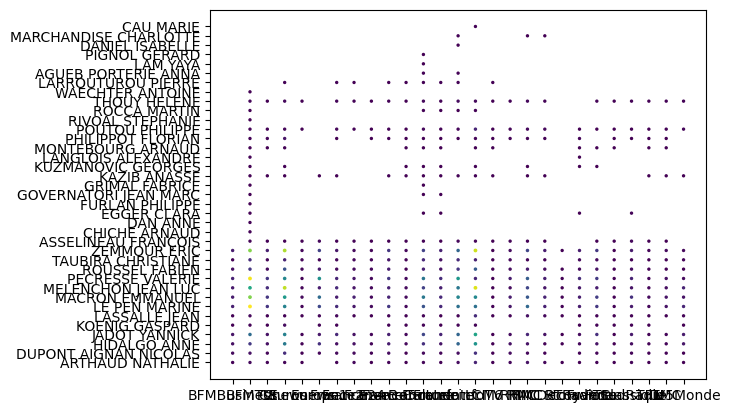

In [157]:

plt.scatter(tpsParoleReadyToPlot['Service'], tpsParoleReadyToPlot['Candidat'], c = tpsParoleReadyToPlot['Durée_S'], s = tpsParoleReadyToPlot['Durée_S'] / tpsParoleReadyToPlot['Durée_S'].max())